# Análise exploratória de dados

## 0. Importando bibliotecas

In [1]:
import mlflow
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

## 1. Data description

In [5]:
df = pd.read_csv("../data/raw/diabetes_prediction_dataset.csv")

In [7]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [6]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


#### The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information. This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. 
- The dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes.

#### 1.1. Características do dataset
1. **Gender**: Gender refers to the biological sex of the individual, which can have an impact on their susceptibility to diabetes. 
2. **Age**: Age is an important factor as diabetes is more commonly diagnosed in older adults.Age ranges from 0-80 in our dataset.
3. **Hypertension**: Hypertension is a medical condition in which the blood pressure in the arteries is persistently elevated. It has values a 0 or 1 where 0 indicates they don’t have hypertension and for 1 it means they have hypertension.
4. **Heart Disease**: Heart disease is another medical condition that is associated with an increased risk of developing diabetes. It has values a 0 or 1 where 0 indicates they don’t have heart disease and for 1 it means they have heart disease.
5. **Smoking History**: Smoking history is also considered a risk factor for diabetes and can exacerbate the complications associated with diabetes.In our dataset we have 5 categories i.e not current,former,No Info,current,never and ever.
6. **BMI**: BMI (Body Mass Index) is a measure of body fat based on weight and height. Higher BMI values are linked to a higher risk of diabetes. The range of BMI in the dataset is from 10.16 to 71.55. BMI less than 18.5 is underweight, 18.5-24.9 is normal, 25-29.9 is overweight, and 30 or more is obese.
7. **HbA1c_level**: HbA1c (Hemoglobin A1c) level is a measure of a person's average blood sugar level over the past 2-3 months. Higher levels indicate a greater risk of developing diabetes. Mostly more than 6.5% of HbA1c Level indicates diabetes.
8. **Blood Glucose Level**: Blood glucose level refers to the amount of glucose in the bloodstream at a given time. High blood glucose levels are a key indicator of diabetes.
9. **Diabetes**: Diabetes is the target variable being predicted, with values of 1 indicating the presence of diabetes and 0 indicating the absence of diabetes.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [14]:
# getting the count values
def value_count():
    print('--------Gender--------')
    print(df['gender'].value_counts())
    print('--------Hypertension--------')
    print(df['hypertension'].value_counts())
    print('--------Heart Disease--------')
    print(df['heart_disease'].value_counts())
    print('--------Smoking History--------')
    print(df['smoking_history'].value_counts())
    print('--------Diabetes--------')
    print(df['diabetes'].value_counts())

value_count()

--------Gender--------
Female    58552
Male      41430
Other        18
Name: gender, dtype: int64
--------Hypertension--------
0    92515
1     7485
Name: hypertension, dtype: int64
--------Heart Disease--------
0    96058
1     3942
Name: heart_disease, dtype: int64
--------Smoking History--------
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64
--------Diabetes--------
0    91500
1     8500
Name: diabetes, dtype: int64


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'hypertension'}>,
        <AxesSubplot:title={'center':'heart_disease'}>],
       [<AxesSubplot:title={'center':'bmi'}>,
        <AxesSubplot:title={'center':'HbA1c_level'}>,
        <AxesSubplot:title={'center':'blood_glucose_level'}>],
       [<AxesSubplot:title={'center':'diabetes'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

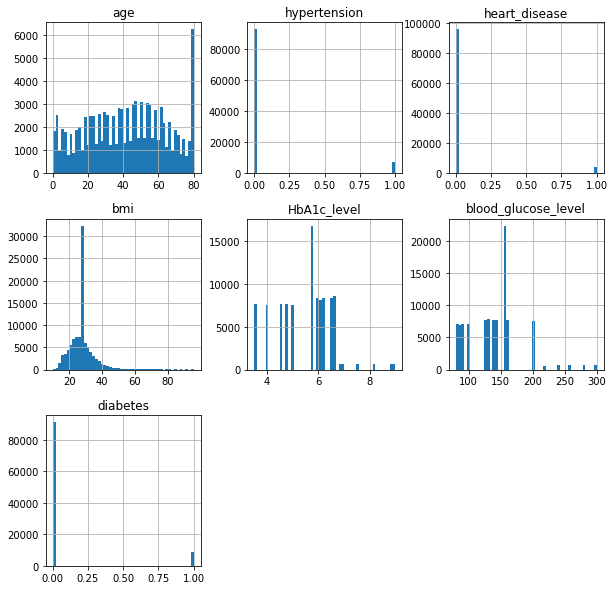

In [16]:
%matplotlib inline
# some histograms for a initial analisys
df.hist(bins=50, figsize=(10,10))

In [17]:
df.corr()

C:\Users\clara\AppData\Local\Temp\ipykernel_9672\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008
hypertension,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


## 2. Data Analysis

In [18]:
miss_values = (df.isnull().sum())
print(f'{miss_values} fault values')

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64 fault values


In [19]:
# function to use distribuition graph
def distplot(data_column):
    graph = sns.distplot(data_column,hist=True,kde=True,hist_kws={'linewidth':3})

def pie_graph(data,title,values):
    labels = data[values].value_counts().index
    values = data[values].value_counts()
    fig = go.Figure(data=(go.Pie(labels=labels,values=values)))
    fig.update_layout(title_text = title)
    fig.show()

C:\Users\clara\AppData\Local\Temp\ipykernel_9672\2489533227.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  graph = sns.distplot(data_column,hist=True,kde=True,hist_kws={'linewidth':3})


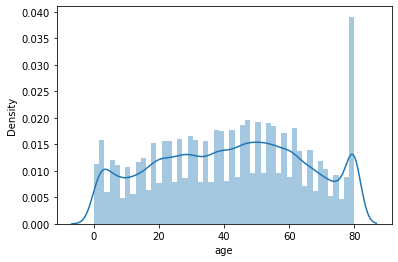

In [20]:
graph = distplot(df['age'])

In [21]:
def split_age(age):
    if age < 10:
        return '0-9'
    if  20 >  age >= 10:
        return '10-20'
    if  30>  age >= 20:
        return '20-30'
    if  40 >  age >= 30:
        return '30-40'
    if  50 >  age >= 40:
        return '40-50'
    if  60 >  age >= 50:
        return '50-60'
    if age > 60:
        return '60+'

In [22]:
df_cat = pd.DataFrame()
df_cat['age_cat'] = df['age'].apply(split_age)
pie_graph(df_cat,'Age Distribuition Pie Graph','age_cat')

<AxesSubplot:xlabel='gender', ylabel='count'>

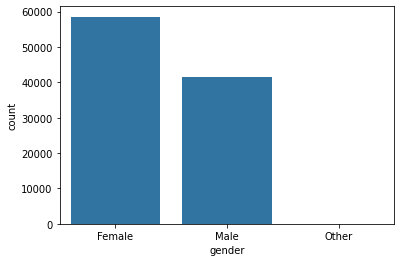

In [24]:
sns.countplot(data=df,x='gender')
# the dataset have a desbalanced in gender 

<AxesSubplot:xlabel='diabetes', ylabel='count'>

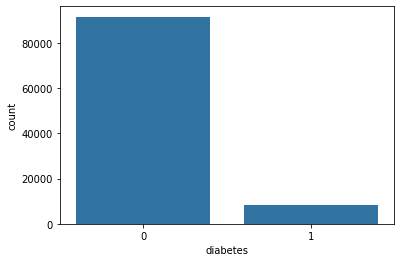

In [25]:
sns.countplot(data=df,x='diabetes')

In [26]:
pie_graph(df,'Smoking History', 'smoking_history')

C:\Users\clara\AppData\Local\Temp\ipykernel_9672\2489533227.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




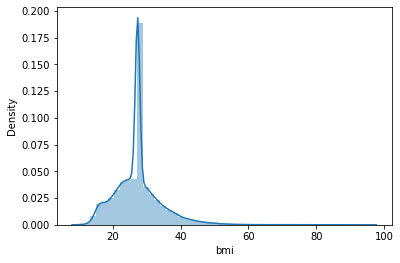

In [27]:
distplot(df['bmi'])

C:\Users\clara\AppData\Local\Temp\ipykernel_9672\2489533227.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




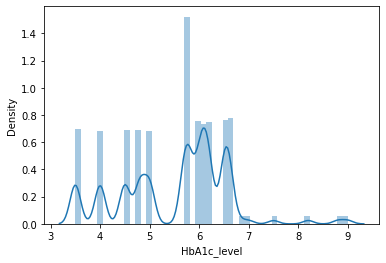

In [28]:
distplot(df['HbA1c_level'])

C:\Users\clara\AppData\Local\Temp\ipykernel_9672\2489533227.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




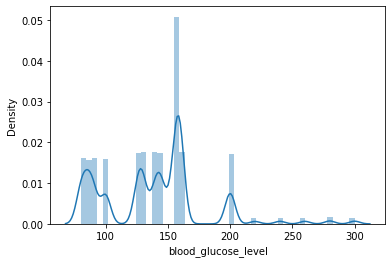

In [29]:
distplot(df['blood_glucose_level'])

C:\Users\clara\AppData\Local\Temp\ipykernel_9672\586043186.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot:>

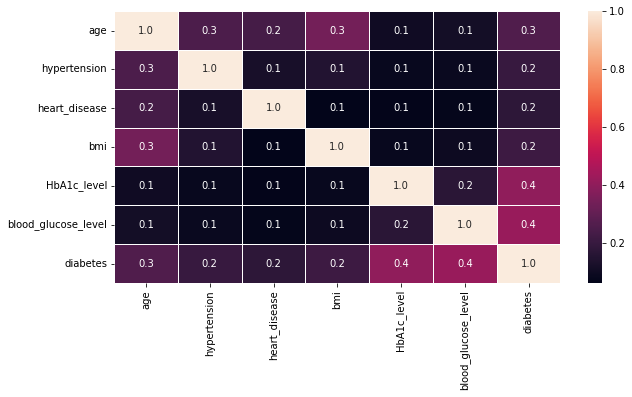

In [30]:
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(df.corr(), annot=True,linewidths=.5,fmt='.1f', ax=ax)

## 3. Training Algorithm

In [31]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X = df.drop('diabetes', axis=1)
y = df['diabetes'].copy()

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [35]:
categorical_columns = ['gender', 'hypertension', 'smoking_history', 'heart_disease']
numerical_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [37]:
def Build_Model(model, categorical_columns, numerical_columns):
    cat_pipeline = OneHotEncoder(handle_unknown='ignore')
    numerical_pipeline = StandardScaler()
    column_transform = ColumnTransformer([('categorical_pipeline', cat_pipeline, categorical_columns ), ('numerical_pipeline', numerical_pipeline, numerical_columns)])
    return Pipeline([('ColumnTransformer', column_transform), ('classifier', model)])

In [38]:
mlflow.sklearn.autolog()

In [39]:
from sklearn.naive_bayes import GaussianNB

In [40]:
model = GaussianNB()
model = Build_Model(model, categorical_columns, numerical_columns)
model

Pipeline(steps=[('ColumnTransformer',
                 ColumnTransformer(transformers=[('categorical_pipeline',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'hypertension',
                                                   'smoking_history',
                                                   'heart_disease']),
                                                 ('numerical_pipeline',
                                                  StandardScaler(),
                                                  ['age', 'bmi', 'HbA1c_level',
                                                   'blood_glucose_level'])])),
                ('classifier', GaussianNB())])

In [41]:
model.fit(X_train,y_train)

2024/05/03 14:17:32 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'f0f237772b0d4deda91aa76c6211294c', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/05/03 14:29:28 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\clara\AppData\Local\Programs\Python\Python310\lib\site-packages\mlflow\types\utils.py:394: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Inte

Pipeline(steps=[('ColumnTransformer',
                 ColumnTransformer(transformers=[('categorical_pipeline',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'hypertension',
                                                   'smoking_history',
                                                   'heart_disease']),
                                                 ('numerical_pipeline',
                                                  StandardScaler(),
                                                  ['age', 'bmi', 'HbA1c_level',
                                                   'blood_glucose_level'])])),
                ('classifier', GaussianNB())])

In [42]:
y_pred = model.predict(X_test)

2024/05/03 14:33:46 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\clara\AppData\Local\Programs\Python\Python310\lib\site-packages\mlflow\types\utils.py:394: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [44]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
mac = f1_score(y_test, y_pred)

print(acc, prec, rec, mac)

0.7604 0.2512100677637948 0.9115925058548009 0.3938780672906653


In [45]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
model_rf = RandomForestClassifier(max_depth=5, n_estimators = 50)
model_rf = Build_Model(model_rf, categorical_columns, numerical_columns)
model_rf

Pipeline(steps=[('ColumnTransformer',
                 ColumnTransformer(transformers=[('categorical_pipeline',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'hypertension',
                                                   'smoking_history',
                                                   'heart_disease']),
                                                 ('numerical_pipeline',
                                                  StandardScaler(),
                                                  ['age', 'bmi', 'HbA1c_level',
                                                   'blood_glucose_level'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=5, n_estimators=50))])

In [52]:
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)

2024/05/03 14:57:15 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'b755233dab334e4da5bf31909d7b380f', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


2024/05/03 15:09:12 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\clara\AppData\Local\Programs\Python\Python310\lib\site-packages\mlflow\types\utils.py:394: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2024/05/03 15:09:19 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\clara\AppData\Lo

In [53]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
mac = f1_score(y_test, y_pred)

print(acc, prec, rec, mac)

0.97215 1.0 0.6738875878220141 0.8051766351871283


In [54]:
from sklearn.neural_network import MLPClassifier

In [55]:
model_mlp = MLPClassifier(max_iter=50)
model_mlp = Build_Model(model_mlp, categorical_columns, numerical_columns)
model_mlp

Pipeline(steps=[('ColumnTransformer',
                 ColumnTransformer(transformers=[('categorical_pipeline',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'hypertension',
                                                   'smoking_history',
                                                   'heart_disease']),
                                                 ('numerical_pipeline',
                                                  StandardScaler(),
                                                  ['age', 'bmi', 'HbA1c_level',
                                                   'blood_glucose_level'])])),
                ('classifier', MLPClassifier(max_iter=50))])

In [56]:
model_mlp.fit(X_train, y_train)
y_pred = model_mlp.predict(X_test)

2024/05/03 15:19:26 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'd62591f07bd74dd7ae29061554eaa510', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/05/03 15:30:29 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\clara\AppData\Local\Programs\Python\Python310\lib\site-packages\mlflow\types\utils.py:394: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Inte

In [57]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
mac = f1_score(y_test, y_pred)

print(acc, prec, rec, mac)

0.97235 0.9832635983263598 0.6879391100702577 0.8095074061315881


In [58]:
from xgboost import XGBClassifier
from sklearn.svm import SVC